<a href="https://colab.research.google.com/github/JeanMusenga/PhD-Thesis_2024_Musenga/blob/main/TextCNN_with_TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://chatgpt.com/share/6b20ab3c-04a2-4b5b-b39b-6531835e3571

In [ ]:
pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
file_path = './saved_file'
file_path = ('posts.xlsx')
data = pd.read_excel(file_path)

In [4]:
class_distribution = data['Label'].value_counts()
print(class_distribution)

Label
1    7466
0    7466
Name: count, dtype: int64


# Preprocess the data

In [5]:
# Preprocess the data
X = data['Question_body']
y = data['Label']

In [6]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [8]:
# Parameters
vocab_size = 5000
embedding_dim = 100
max_length = 500
trunc_type = 'post'
padding_type = 'post'


In [9]:
# Tokenize the data
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


In [10]:
# Pad the sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)


# TextCNN model
https://chatgpt.com/share/d5dd93d5-d7a7-4488-9bfb-8824d7cffe39

The create_text_cnn_model function you provided constructs a TextCNN model for binary text classification. This model uses multiple convolutional layers with different kernel sizes to capture various features from the text data, followed by pooling and concatenation. Here's a detailed explanation of the components:

Inputs Layer: Specifies the input shape, which is the maximum length of the sequences.
Embedding Layer: Transforms input tokens into dense vectors of fixed size (embedding_dim).
Convolutional and Pooling Layers: Three sets of convolutional layers with different kernel sizes (3, 4, and 5) followed by max pooling. These layers help in capturing different n-gram features from the text.
Concatenate Layer: Concatenates the outputs of the pooling layers along the specified axis.
Flatten Layer: Flattens the concatenated outputs into a single dimension.
Dense Layer: A fully connected layer with ReLU activation.
Dropout Layer: Helps prevent overfitting by randomly dropping units during training.
Output Layer: A single neuron with sigmoid activation for binary classification.
Compile Model: Configures the model for training with binary cross-entropy loss, the Adam optimizer, and accuracy as a metric.

In [11]:
# TextCNN model
def create_text_cnn_model(vocab_size, embedding_dim, max_length):
    inputs = Input(shape=(max_length,))
    embedding = Embedding(vocab_size, embedding_dim, input_length=max_length)(inputs)

    conv1 = Conv1D(128, 3, activation='relu')(embedding)
    pool1 = MaxPooling1D(pool_size=2)(conv1)

    conv2 = Conv1D(128, 4, activation='relu')(embedding)
    pool2 = MaxPooling1D(pool_size=2)(conv2)

    conv3 = Conv1D(128, 5, activation='relu')(embedding)
    pool3 = MaxPooling1D(pool_size=2)(conv3)

    concatenated = concatenate([pool1, pool2, pool3], axis=1)
    flatten = Flatten()(concatenated)
    dense1 = Dense(128, activation='relu')(flatten)
    dropout = Dropout(0.5)(dense1)
    outputs = Dense(1, activation='sigmoid')(dropout)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

# Create the model

In [12]:
# Create the model
text_cnn_model = create_text_cnn_model(vocab_size, embedding_dim, max_length)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# Display the model summary

In [13]:
# Display the model summary
text_cnn_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 500)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 500, 100)       │        500,000 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 498, 128)       │         38,528 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 497, 128)       │         51,328 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 496, 128)       │         64,128 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 249, 128)       │              0 │ conv1d[0][0]           │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_1           │ (None, 248, 128)       │              0 │ conv1d_1[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_2           │ (None, 248, 128)       │              0 │ conv1d_2[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 745, 128)       │              0 │ max_pooling1d[0][0],   │
│                           │                        │                │ max_pooling1d_1[0][0], │
│                           │                        │                │ max_pooling1d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 95360)          │              0 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │     12,206,208 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │            129 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 12,860,321 (49.06 MB)

 Trainable params: 12,860,321 (49.06 MB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [14]:
# Train the model
history = text_cnn_model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_data=(X_test_padded, y_test))

# Evaluate the model
loss, accuracy = text_cnn_model.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {accuracy}')

Epoch 1/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 269s 697ms/step - accuracy: 0.8901 - loss: 0.2582 - val_accuracy: 0.9679 - val_loss: 0.1138
Epoch 2/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 273s 731ms/step - accuracy: 0.9797 - loss: 0.0632 - val_accuracy: 0.9635 - val_loss: 0.1751
Epoch 3/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 306s 689ms/step - accuracy: 0.9833 - loss: 0.0429 - val_accuracy: 0.9662 - val_loss: 0.1785
Epoch 4/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 256s 674ms/step - accuracy: 0.9940 - loss: 0.0173 - val_accuracy: 0.9622 - val_loss: 0.2756
Epoch 5/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 252s 647ms/step - accuracy: 0.9956 - loss: 0.0124 - val_accuracy: 0.9655 - val_loss: 0.2821
Epoch 6/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 267s 661ms/step - accuracy: 0.9949 - loss: 0.0155 - val_accuracy: 0.9669 - val_loss: 0.3272
Epoch 7/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 255s 643ms/step - accuracy: 0.9984 - loss: 0.0051 - val_accuracy: 0.9662 - val_loss: 0.2897
Epoch 8/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 265s 651ms/step - accuracy: 0.9980 -

# Predict on new data

In [18]:
# Predict on new data
y_pred = text_cnn_model.predict(X_test_padded)
y_pred_classes = (y_pred > 0.5).astype("int32")

# If y_test is already binary, use it directly
y_true_classes = y_test  # No need to apply argmax


94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 276ms/step


# Evaluate predictions

In [19]:
# Evaluate predictions
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_classes)
print(report)


              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1504
           1       0.95      0.99      0.97      1483

    accuracy                           0.97      2987
   macro avg       0.97      0.97      0.97      2987
weighted avg       0.97      0.97      0.97      2987



In [21]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
# Calculate precision, recall, f1-score, and support
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_true_classes, y_pred_classes, average=None)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Calculate class-wise accuracy
accuracy_class_0 = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]) if (conf_matrix[0, 0] + conf_matrix[0, 1]) > 0 else 0
accuracy_class_1 = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0]) if (conf_matrix[1, 1] + conf_matrix[1, 0]) > 0 else 0

# Compute overall accuracy
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()

# Print metrics
print(f'Class 0 - Precision: {precision_class[0]:.4f}, Recall: {recall_class[0]:.4f}, F1-score: {f1_class[0]:.4f}, Support: {support_class[0]}, Accuracy: {accuracy_class_0:.4f}')
print(f'Class 1 - Precision: {precision_class[1]:.4f}, Recall: {recall_class[1]:.4f}, F1-score: {f1_class[1]:.4f}, Support: {support_class[1]}, Accuracy: {accuracy_class_1:.4f}')
print(f'Overall Accuracy: {accuracy:.4f}')


Class 0 - Precision: 0.9896, Recall: 0.9468, F1-score: 0.9677, Support: 1504, Accuracy: 0.9468
Class 1 - Precision: 0.9483, Recall: 0.9899, F1-score: 0.9687, Support: 1483, Accuracy: 0.9899
Overall Accuracy: 0.9682


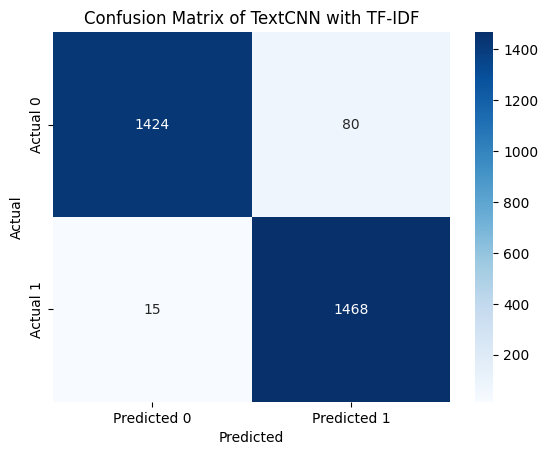

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure y_test is in binary format
y_true_classes = y_test

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of TextCNN with TF-IDF')
plt.show()


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step


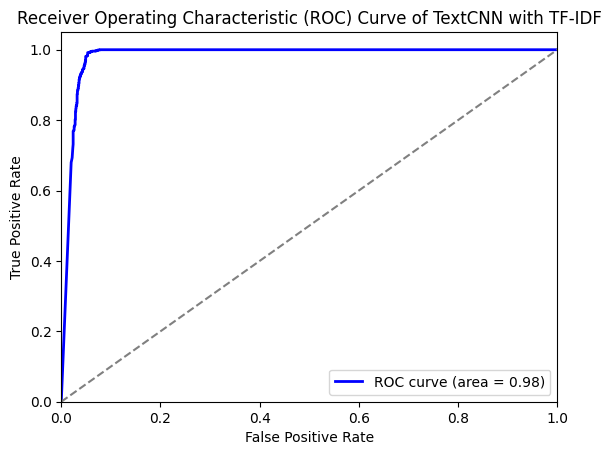

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities (instead of classes) for the positive class
y_pred_prob = text_cnn_model.predict(X_test_padded).ravel()

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of TextCNN with TF-IDF')
plt.legend(loc="lower right")
plt.show()
